In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hospital-accreditation/jci_hospital_compliance_data.csv


In [4]:
!pip install -q streamlit fpdf

  Preparing metadata (setup.py) ... done


2025-04-16 13:20:00.644 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.790 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-16 13:20:00.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 13:20:00.803 Session state does not 

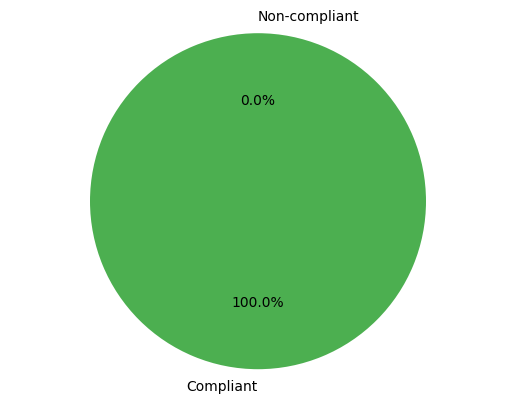

In [5]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import os

# Load dataset (adjust the path if necessary)
df = pd.read_csv("/kaggle/input/hospital-accreditation/jci_hospital_compliance_data.csv")

# App Title
st.title("🏥 JCI Compliance Dashboard for Rajasthan Government Hospitals")

# Hospital Selector
hospital = st.selectbox("Select a Hospital to Audit:", df["Hospital_Name"].tolist())

# Extract selected hospital row
row = df[df["Hospital_Name"] == hospital].squeeze()
compliance_cols = df.columns.difference(["Hospital_Name", "Accreditation_Status"])

# Calculate Compliance Score
yes_count = sum(row[col] == "Yes" for col in compliance_cols)
total = len(compliance_cols)
score = round((yes_count / total) * 100, 2)

# Display results
st.subheader(f"Accreditation Status: {row['Accreditation_Status']}")
st.metric("JCI Compliance Score", f"{score}%")

# Pie Chart
labels = ['Compliant', 'Non-compliant']
values = [yes_count, total - yes_count]
colors = ['#4CAF50', '#FF7043']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
st.pyplot(fig)

# Final Recommendation
if row["Accreditation_Status"] == "Accredited":
    rec = "✅ Recommended for International Patients"
    st.success(rec)
else:
    rec = "⚠️ Not yet ready for international accreditation."
    st.warning(rec)

# Export as PDF
if st.button("📄 Export PDF Report"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=14)

    pdf.cell(200, 10, txt=f"JCI Compliance Report", ln=True, align='C')
    pdf.cell(200, 10, txt=f"Hospital: {hospital}", ln=True, align='L')
    pdf.cell(200, 10, txt=f"Accreditation Status: {row['Accreditation_Status']}", ln=True, align='L')
    pdf.cell(200, 10, txt=f"Compliance Score: {score}%", ln=True, align='L')
    pdf.cell(200, 10, txt=f"Recommendation: {rec}", ln=True, align='L')

    pdf.ln(10)
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Compliance Details:", ln=True, align='L')
    for col in compliance_cols:
        status = row[col]
        pdf.cell(200, 8, txt=f"{col.replace('_', ' ')}: {status}", ln=True, align='L')

    pdf.output("jci_report.pdf")
    st.success("PDF Report generated as jci_report.pdf")

    with open("jci_report.pdf", "rb") as f:
        st.download_button("📥 Download Report", f, file_name="jci_report.pdf")
